In [ ]:
#####

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree

In [2]:
data = pd.read_csv("new_data.csv")

In [3]:
data.describe()

,total_number_of_board_seats,number_of_board_seats_sought,ownership_pecent_on_announcement,price_at_announcement,ltm_eps_at_announcement,earnings_yield_at_announcement,pre_18m_stock_price,pre_12m_stock_price,pre_6m_stock_price,pre_3m_stock_price,...,pre_18m_residual_return,post_6m_residual_return,post_12m_residual_return,post_18m_residual_return,cumulative_6m_residual_return,cumulative_12m_residual_return,cumulative_18m_residual_return,past_return_successes,board_seats_percentage_sought,board_seat_percentage_gained
count,9571.000000,9571.000000,7303.000000,9.032000e+03,8.474000e+03,8322.000000,8.684000e+03,8.841000e+03,8.919000e+03,8.941000e+03,...,8655.000000,8060.000000,7556.000000,7186.000000,7741.000000,7194.000000,6719.000000,5417.000000,1930.000000,1976.000000
mean,1.484380,0.705151,10.008898,2.158990e+13,-7.316388e+04,-0.092548,1.635191e+13,1.368623e+13,1.491199e+13,1.934907e+13,...,0.003154,0.003994,0.002182,0.002455,0.006978,0.004147,0.004697,10.481817,0.514172,0.341569
std,3.184183,1.670631,9.373827,2.051836e+15,5.053619e+06,0.345448,1.523802e+15,1.286870e+15,1.408295e+15,1.829587e+15,...,0.073429,0.085325,0.065067,0.064615,0.126659,0.102617,0.095068,21.334695,0.356591,0.427558
min,0.000000,0.000000,0.000000,1.000000e-04,-4.550000e+08,-1.000000,1.000000e-04,1.000000e-04,1.000000e-04,1.000000e-04,...,-0.077834,-0.222491,-0.115189,-0.085876,-0.339567,-0.200061,-0.144371,0.000000,0.000000,0.000000
25%,0.000000,0.000000,5.200000,4.078750e+00,-5.700000e-01,-0.116521,5.100000e+00,4.800000e+00,4.382500e+00,4.130000e+00,...,-0.022052,-0.030273,-0.025271,-0.021757,-0.047322,-0.039476,-0.032253,1.000000,0.285714,0.000000
50%,0.000000,0.000000,7.140000,1.167000e+01,1.100000e-01,0.015852,1.278000e+01,1.247000e+01,1.175000e+01,1.155000e+01,...,-0.003447,-0.000049,-0.002398,-0.002504,0.000692,-0.003708,-0.002843,3.000000,0.400000,0.000000
75%,0.000000,0.000000,11.170000,2.823250e+01,1.190000e+00,0.055421,2.961561e+01,2.975000e+01,2.850000e+01,2.795000e+01,...,0.013185,0.026093,0.016873,0.013673,0.043002,0.028251,0.023391,9.000000,0.750000,0.714286
max,20.000000,14.000000,100.000000,1.950000e+17,3.247581e+04,2.000000,1.420000e+17,1.210000e+17,1.330000e+17,1.730000e+17,...,2.000000,2.000000,2.000000,2.000000,2.014427,2.025401,2.012714,125.000000,6.000000,3.000000


## General Sense

Text(0.5, 1.0, 'Number of Differnt activist campaign tactic(top 10 most frequency)')

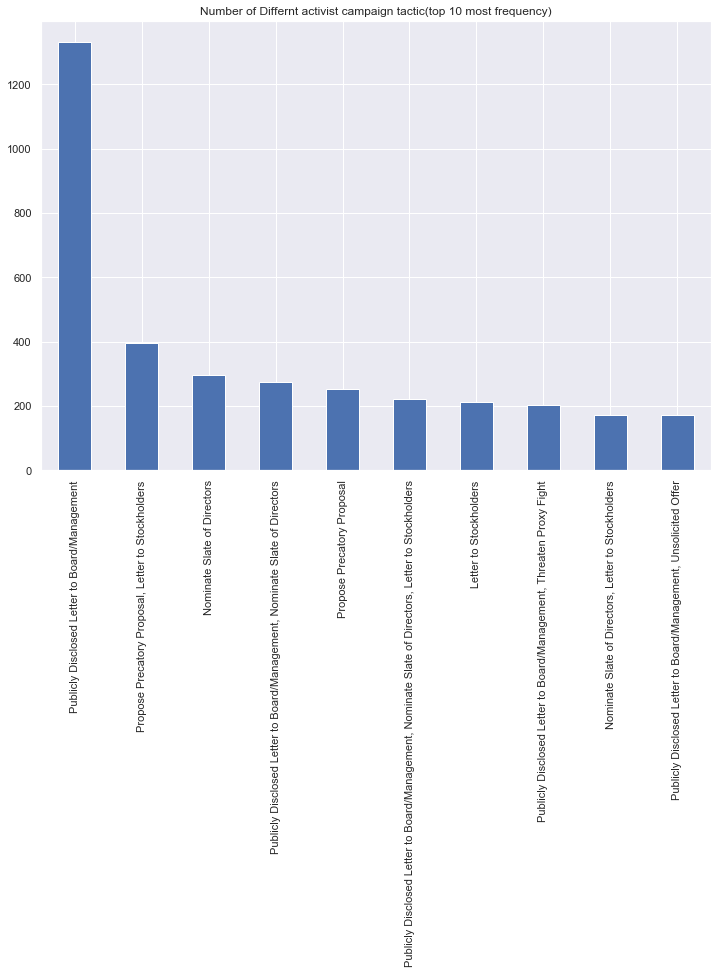

In [6]:
sns.set()
sns.set(rc={'figure.figsize':(12,8.27)})
ax = plt.gca()
data['activist_campaign_tactic'].value_counts()[:10].plot(kind='bar').set_title("Number of Differnt activist campaign tactic(top 10 most frequency)")


In [13]:
subset_one = data[['activist_campaign_tactic',"1_year_post_date_total_return"]]
group_one = subset_one.groupby(["activist_campaign_tactic"]).sum().reset_index()
[['activist_campaign_tactic','1_year_post_date_total_return']]

group_one_subset = group_one[group_one.activist_campaign_tactic.isin(tactics)]
group_one_subset.shape

(20, 2)

Text(0.5, 1.0, '1 year post date total return for Diff activist campaign tactic(top 20 number of activist campaign tactic)')

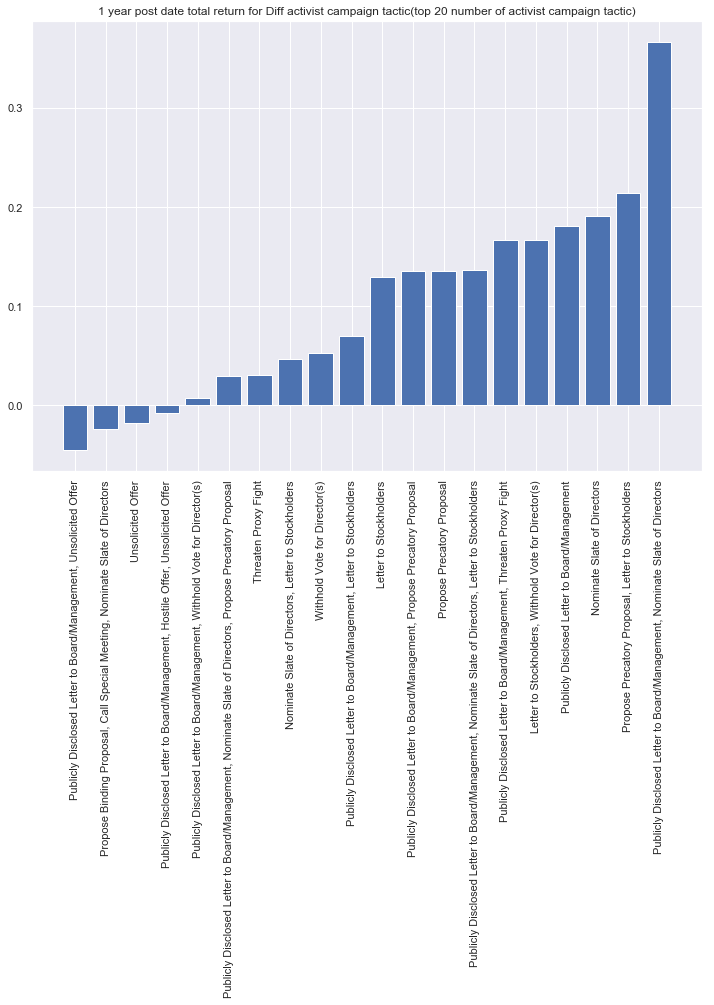

In [14]:
#group_one_subset
sorted_one = group_one_subset.sort_values(by=['1_year_post_date_total_return'])
sorted_one
plt.xticks(rotation=90)
plt.bar(sorted_one["activist_campaign_tactic"],sorted_one["1_year_post_date_total_return"])
plt.title("1 year post date total return for Diff activist campaign tactic(top 20 number of activist campaign tactic)")

In [17]:
###############ownership_pecent_on_announcements

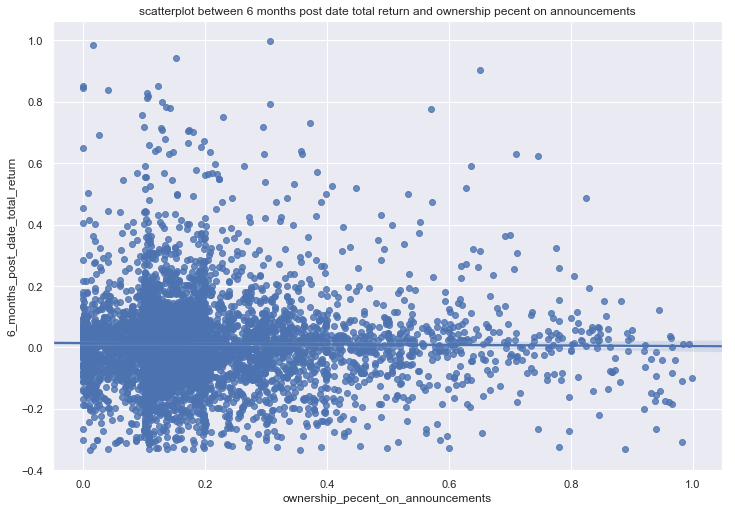

In [18]:
import statsmodels.api as sm

subset_6 = data[data['6_months_post_date_total_return'] < 0.03]
subset_6 = subset_6[subset_6['ownership_pecent_on_announcements']<0.5]
subset_6['ownership_pecent_on_announcements'] = subset_6['ownership_pecent_on_announcements']/0.5
subset_6['6_months_post_date_total_return'] = subset_6['6_months_post_date_total_return']/0.03
g2 = sns.regplot(x = 'ownership_pecent_on_announcements',y ='6_months_post_date_total_return', data = subset_6).set_title("scatterplot between 6 months post date total return and ownership pecent on announcements")

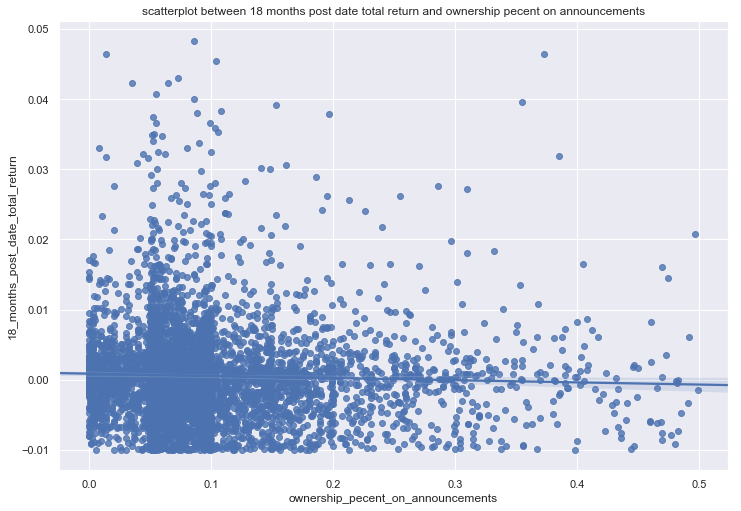

In [19]:
subset_18 = data[data['18_months_post_date_total_return'] < 0.05]
subset_18 = subset_18[subset_18['ownership_pecent_on_announcements']<0.5]
g1 = sns.regplot(x = 'ownership_pecent_on_announcements',y = '18_months_post_date_total_return', data = subset_18).set_title("scatterplot between 18 months post date total return and ownership pecent on announcements")


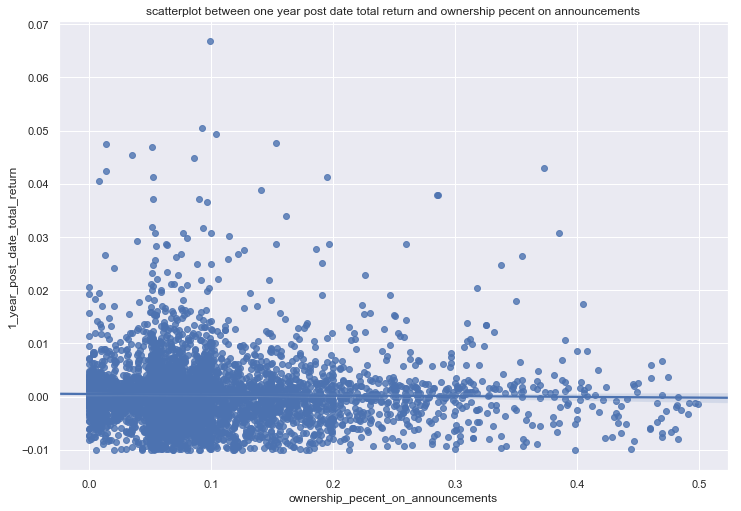

In [20]:
subset_1 = data[data['18_months_post_date_total_return'] < 0.05]
subset_1 = subset_1[subset_1['ownership_pecent_on_announcements']<0.5]

g2 = sns.regplot(x = 'ownership_pecent_on_announcements',y = '1_year_post_date_total_return', data = subset_1).set_title("scatterplot between one year post date total return and ownership pecent on announcements")


In [1]:
#data_owner = data[data['ownership_pecent_on_announcements'] < 0.04]

In [14]:
# data["proxy_campaign_winner_or_result"]

In [95]:
data["proxy_campaign_winner_or_result"].fillna( value = "Others", inplace = True) 

In [96]:
dicts = {
    "Settled/Concessions Made" : "Dissident",
    "Withdrawn" : "Management",
    "Dissident" : "Dissident",
    "Split" : "Dissident",
    "Management" : "Management",
    "Others": "Others",
    "Pending":"Others"
}

In [97]:
data["proxy_result"] = data.proxy_campaign_winner_or_result.apply(lambda x : dicts[x])

In [98]:
#data["proxy_result"]
data2 = data[data['proxy_result'] != 'Others']

In [105]:
data2 = data2[data2['ownership_pecent_on_announcement'] < 50]
#data["proxy_result"] = data[data["proxy_result"] != "Others"]

Text(0.5, 1.0, 'Boxplot for proxy_campaign_winner_or_result and ownership_pecent_on_announcements')

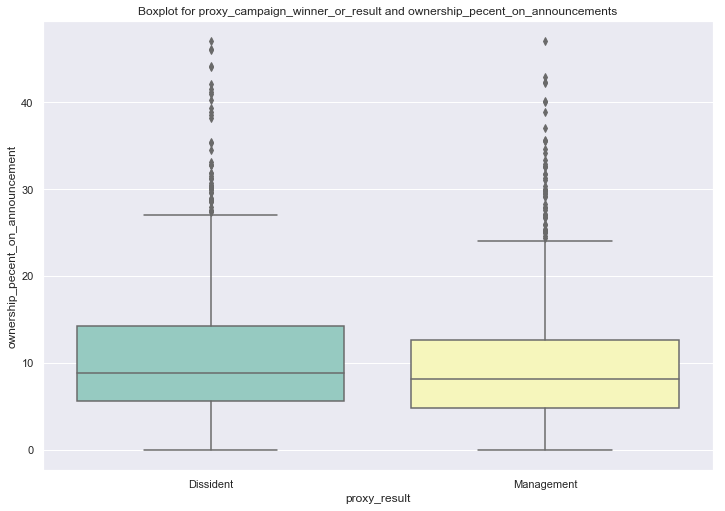

In [106]:
sns.set()
sns.set(rc={'figure.figsize':(12,8.27)})
ax = plt.gca()
g = sns.boxplot(x="proxy_result", y="ownership_pecent_on_announcement",data=data2, palette="Set3").set_title("Boxplot for proxy_campaign_winner_or_result and ownership_pecent_on_announcements")
g

Text(0.5, 1.0, 'Boxplot for proxy_campaign_winner_or_result and ownership_pecent_on_announcements')

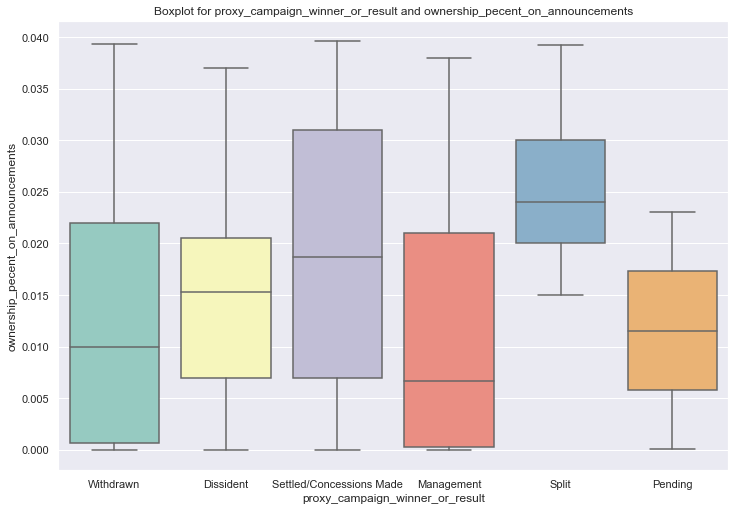

In [23]:
g = sns.boxplot(x="proxy_campaign_winner_or_result", y="ownership_pecent_on_announcements",data=data_owner, palette="Set3").set_title("Boxplot for proxy_campaign_winner_or_result and ownership_pecent_on_announcements")
g

In [87]:
data_drop = data[data.number_of_board_seats_sought != 0]
data_drop
data_drop["number_of_board_seats_gained"].fillna( value = 0, inplace = True) 

In [88]:
data_drop["seat_gain_success"] = data_drop["number_of_board_seats_gained"]/data_drop["number_of_board_seats_sought"]

/Users/jiezheng/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [89]:
#data_drop["seat_gain_success"] 

In [90]:
# def age_groups(data):
#     if data == 1:
#         return 1
#     else:
#         return 0

# data_drop['seat gain success'] = data_drop['seat_gain_success'].apply(age_groups)

In [91]:
def age_groups(data):
    if data == 1:
        return 1
    else:
        return 0

data_drop['seat gain success'] = data_drop['seat_gain_success'].apply(age_groups)

/Users/jiezheng/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [92]:
data_drop['seat gain success']

7       0
13      1
14      0
22      0
23      0
38      0
49      0
62      0
65      0
97      1
113     0
144     0
151     0
164     1
172     0
178     1
180     0
193     0
194     0
197     1
201     0
203     0
209     1
210     0
216     0
218     1
220     0
224     0
231     1
232     1
       ..
9418    0
9420    0
9425    0
9426    1
9429    0
9441    0
9466    1
9470    0
9472    0
9479    0
9481    0
9487    1
9489    1
9490    1
9492    1
9493    1
9494    1
9495    1
9496    1
9505    0
9507    0
9521    0
9527    0
9529    0
9534    0
9537    0
9545    0
9550    0
9557    1
9568    0
Name: seat gain success, Length: 1976, dtype: int64

In [93]:
# data_drop_group["seat_gain_success"]

(array([0, 1]), <a list of 2 Text xticklabel objects>)

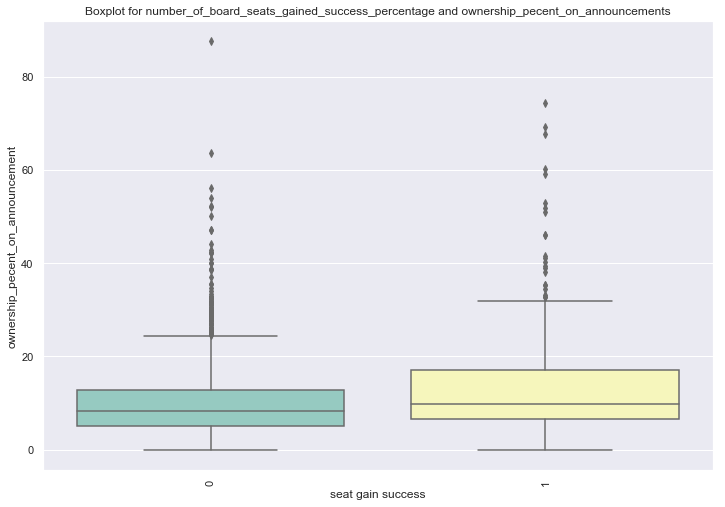

In [94]:
#data_owner = data_owner[data_owner['number_of_board_seats_gained'] < 7]
#datas = data_drop[data_drop["seat_gain_success"] > 0.5]
#datas = data_drop[data_drop["seat_gain_success"] <0.6 ]
#data_drop = data_drop[data_drop['ownership_pecent_on_announcement'] < 0.8]
g = sns.boxplot(x="seat gain success", y="ownership_pecent_on_announcement",data=data_drop, palette="Set3").set_title("Boxplot for number_of_board_seats_gained_success_percentage and ownership_pecent_on_announcements")
g
plt.xticks(rotation=90)

In [ ]:
######### campaign_objective_primary

In [90]:
# data['campaign_objective_primary'].value_counts().plot(kind='bar').set_title("Number of Differnt campaign objective primary")
# #campaign_objective_primary

In [91]:
# g3 = sns.boxplot(x="campaign_objective_primary", y="6_months_post_date_total_return",data=data, palette="Set3")
# plt.xticks(rotation=90)
# g3

In [92]:
# g4 = sns.boxplot(x="campaign_objective_primary", y="1_year_post_date_total_return",data=data, palette="Set3")
# plt.xticks(rotation=90)
# g4

In [93]:
# g5 = sns.boxplot(x="campaign_objective_primary", y="18_months_post_date_total_return",data=data, palette="Set3")
# plt.xticks(rotation=90)
# g5

In [ ]:
######value

In [72]:
# g = sns.boxplot(y="number_of_board_seats_gained", x="value_demand",data=data, palette="Set3")
# plt.xticks(rotation=90)
# g

In [94]:
# g5 = sns.boxplot(y="6_months_post_date_total_return", x="value_demand",data=data, palette="Set3")
# plt.xticks(rotation=90)
# g5

In [95]:
# g6 = sns.boxplot(y="1_year_post_date_total_return", x="value_demand",data=data, palette="Set3")
# plt.xticks(rotation=90)
# g6

In [96]:
# g6 = sns.boxplot(y="18_months_post_date_total_return", x="value_demand",data=data, palette="Set3")
# plt.xticks(rotation=90)
# g6

In [12]:
clf = tree.DecisionTreeClassifier(max_depth=2)

In [13]:
data_target = data[["proxy_campaign_winner_or_result"]]

In [14]:
data_train = data[["ownership_pecent_on_announcements"]]

In [2]:
###tree = DecisionTreeClassifier(max_depth=2)
#clf.fit(data_target, data_train)

In [ ]:
###### figure7   从0开始